import libs and extensions

In [1]:
import pandas as pd
import sklearn.cluster
import sklearn.decomposition

import os.path
import sys

%load_ext autoreload
%autoreload 1

set autoreload and add "src" as a directory for module import

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

%aimport features.normalizer
%aimport features.tools
%aimport data.tools
%aimport data.cesatem
%aimport data.esa
%aimport models
%aimport visualization.simple

import sources code from core

In [3]:
import data.cesatem
import data.esa

import features.normalizer
import features.tools

import visualization.simple

load CESATEM dataset and transform them to quaterly format

In [4]:
data_frame1, columns1 = data.cesatem.without_micro()
data_frame1 = features.tools.temporal_merge(data_frame1, 3)[columns1]
data_frame1.head()

,CESATEM_BR,CESATEM_BS,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD
0,3257,3114,8886,13265,1494,3047,2452,1750,2026,8883,4504,3314
1,3290,3124,9242,13396,1455,3355,2828,1781,2197,9084,4675,3839
2,3227,3067,9331,13359,1627,3546,2988,1888,2055,9343,4636,3790
3,3250,3094,9271,13342,1432,3311,2761,1804,2081,8923,4570,3573
4,3282,3085,9020,12866,1421,3201,2566,1764,2069,9238,4820,3277


load ESA dataset

In [5]:
data_frame2, columns2 = data.esa.data_set()
data_frame2.head()

,Date,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,199.5,1413.5,248.2,239.2,368.5,647.1,241.2,488.6,376.4,589.0
1,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,202.9,1457.1,247.9,240.0,373.2,655.4,241.5,487.0,377.4,620.6
2,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,206.9,1483.1,247.9,240.5,377.2,662.8,238.7,487.5,378.5,632.9
3,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,210.0,1475.9,247.6,242.3,379.8,667.8,247.8,493.8,379.7,614.5
4,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,211.9,1511.3,247.3,242.8,382.8,672.4,246.8,494.1,381.1,636.0


merge both dataset

In [6]:
data_frame = pd.concat([data_frame2, data_frame1], axis=1)
data_frame.head()

,Date,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,...,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD
0,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,8886,13265,1494,3047,2452,1750,2026,8883,4504,3314
1,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,9242,13396,1455,3355,2828,1781,2197,9084,4675,3839
2,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,9331,13359,1627,3546,2988,1888,2055,9343,4636,3790
3,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,9271,13342,1432,3311,2761,1804,2081,8923,4570,3573
4,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,9020,12866,1421,3201,2566,1764,2069,9238,4820,3277


Build and display the matrix correlation

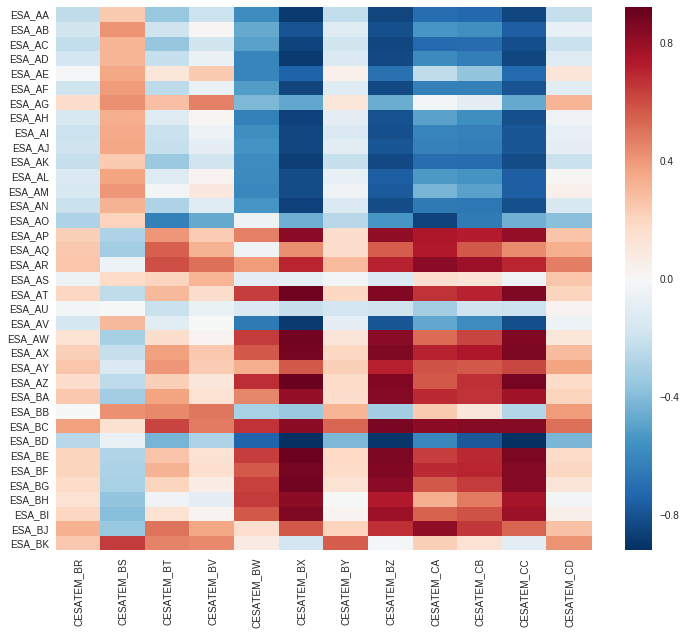

In [18]:
corr = data_frame.corr()
corr = corr[columns1].filter(items=columns2, axis=0)

visualization.simple.heat_map(corr, columns1, columns2, (12, 10))

normalize all columns

In [8]:
norm_data = data_frame.copy().drop("Date", axis=1)
norm_data = features.normalizer.simple_min_max(norm_data)
norm_data = pd.concat([norm_data, data_frame[["Date"]]], axis=1)

Display ome examples of linear regressin and correlation

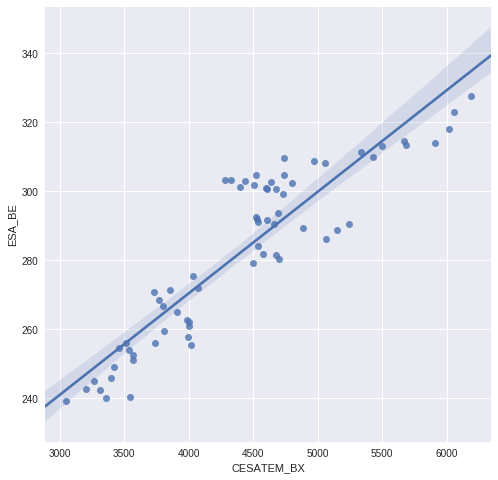

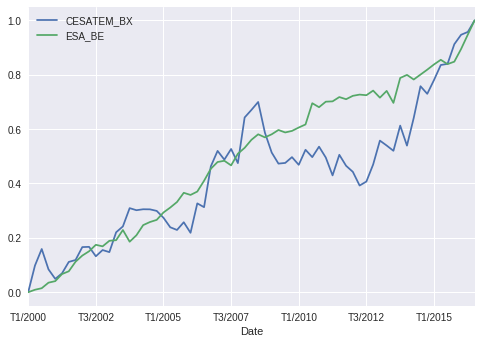

In [9]:
visualization.simple.linear_regression(data_frame, "CESATEM_BX", "ESA_BE", (8, 8))
visualization.simple.temporal(norm_data, ["CESATEM_BX", "ESA_BE"])

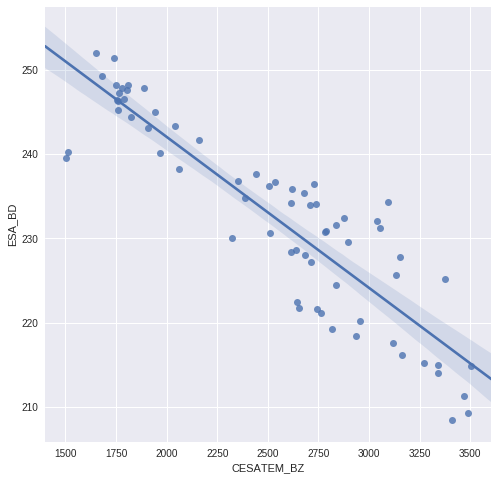

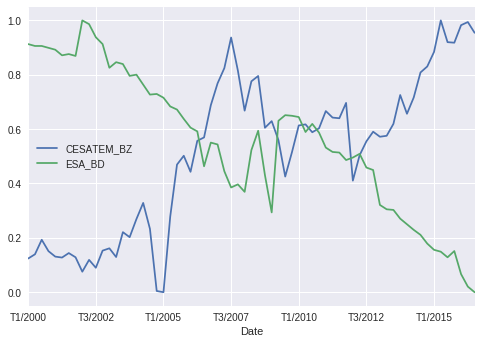

In [10]:
visualization.simple.linear_regression(data_frame, "CESATEM_BZ", "ESA_BD", (8, 8))
visualization.simple.temporal(norm_data, ["CESATEM_BZ", "ESA_BD"])

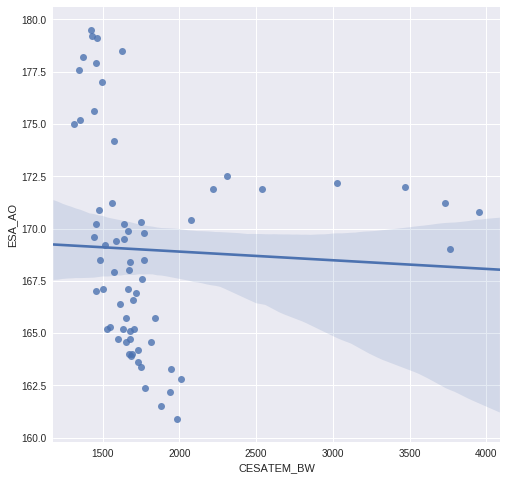

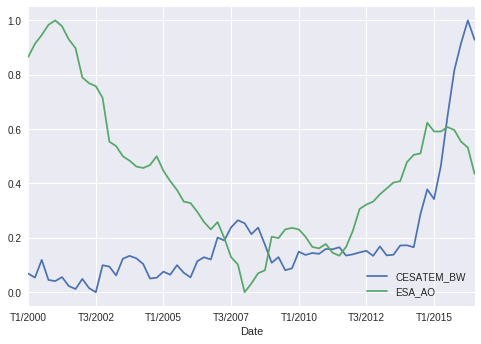

In [11]:
visualization.simple.linear_regression(data_frame, "CESATEM_BW", "ESA_AO", (8, 8))
visualization.simple.temporal(norm_data, ["CESATEM_BW", "ESA_AO"])

normalize with min_max and apply kmeans

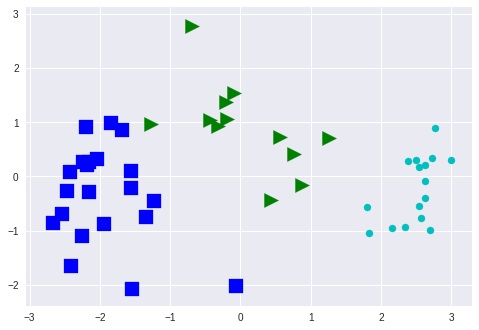

In [16]:
s_data = norm_data.copy().drop("Date", axis=1).transpose()

reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=3, random_state=0).fit(reduced_data)

visualization.simple.k_means(reduced_data, kmeans.labels_)